based on the result from canberra_property_linear_regression.ipynb
all the analysis is based on the new_output.csv

In [1]:
import pandas as pd
import re
import math

In [2]:
df=pd.read_csv('new_output.csv')

In [3]:
pattern=re.compile(r'\d{4}')
def add_year_to_pd(row):
    date=row['sold_date']
    r=pattern.search(date)
    if r:
        return int(r.group())
    else:
        return 2017

In [4]:
df['year']=df.apply(lambda row:add_year_to_pd(row),axis=1)

In [5]:
def adjust_price_3_percent_increase(row):
    price=row['price_int']
    year=row['year']
    years_elapse=2017-year
    adjusted_price=price*(math.pow(1.03,years_elapse))
    return adjusted_price

In [6]:
df['adjust_price']=df.apply(lambda row:adjust_price_3_percent_increase(row),axis=1)

In [7]:
df.head()

,Unnamed: 0,price,address,suburb,type,date,bed,bath,carpark,link,refer,new_price,price_int,sold_date,month,year,adjust_price
0,22,"$1,175,000",71 Newdegate Street,Deakin,house,Sold on 03 Mar 2017,3,2,2,http://www.realestate.com.au/sold/property-hou...,https://www.realestate.com.au/sold/in-2600%3b/...,1175000,1175000,"time.struct_time(tm_year=2017, tm_mon=3, tm_md...",3,2017,1175000.0
1,23,"$1,700,000",30 Mueller Street,Yarralumla,house,Sold on 18 Feb 2017,4,3,2,http://www.realestate.com.au/sold/property-hou...,https://www.realestate.com.au/sold/in-2600%3b/...,1700000,1700000,"time.struct_time(tm_year=2017, tm_mon=2, tm_md...",2,2017,1700000.0
2,24,"$991,000",44 Macgregor Street,Deakin,house,Sold on 18 Feb 2017,3,1,1,http://www.realestate.com.au/sold/property-hou...,https://www.realestate.com.au/sold/in-2600%3b/...,991000,991000,"time.struct_time(tm_year=2017, tm_mon=2, tm_md...",2,2017,991000.0
3,25,"$1,125,000",24 Norman Street,Deakin,house,Sold on 09 Feb 2017,4,2,1,http://www.realestate.com.au/sold/property-hou...,https://www.realestate.com.au/sold/in-2600%3b/...,1125000,1125000,"time.struct_time(tm_year=2017, tm_mon=2, tm_md...",2,2017,1125000.0
4,29,"$1,450,000",25 Telopea Park,Barton,house,Sold on 21 Dec 2016,2,1,0,http://www.realestate.com.au/sold/property-hou...,https://www.realestate.com.au/sold/in-2600%3b/...,1450000,1450000,"time.struct_time(tm_year=2016, tm_mon=12, tm_m...",12,2016,1493500.0


In [7]:
north=df[(df['suburb']=='Gungahlin') | (df['suburb']=='Ngunnawal') | (df['suburb']=='Harrison') | (df['suburb']=='Bonner') | (df['suburb']=='Franklin') | (df['suburb']=='Casey')]

In [8]:
north=north[north['adjust_price']<1500000]

In [9]:
north.count()

Unnamed: 0      3642
price           3642
address         3642
suburb          3642
type            3642
date            3642
bed             3642
bath            3642
carpark         3642
link            3642
refer           3642
new_price       3642
price_int       3642
sold_date       3642
month           3642
year            3642
adjust_price    3642
dtype: int64

In [10]:
north.head()

,Unnamed: 0,price,address,suburb,type,date,bed,bath,carpark,link,refer,new_price,price_int,sold_date,month,year,adjust_price
12840,21838,"$255,000",34/6 Gungahlin Place,Gungahlin,house,Sold on 14 Oct 2016,1,1,1,http://www.realestate.com.au/sold/property-hou...,https://www.realestate.com.au/sold/between-0-3...,255000,255000,"time.struct_time(tm_year=2016, tm_mon=10, tm_m...",10,2016,262650.000000
12841,21840,"$320,000",47b Mary Gillespie Avenue,Gungahlin,house,Sold on 03 Aug 2016,2,1,1,http://www.realestate.com.au/sold/property-hou...,https://www.realestate.com.au/sold/between-0-3...,320000,320000,"time.struct_time(tm_year=2016, tm_mon=8, tm_md...",8,2016,329600.000000
13075,22160,"$355,000",303 Anthony Rolfe Street,Gungahlin,house,Sold on 12 Dec 2008,2,2,2,http://www.realestate.com.au/sold/property-hou...,https://www.realestate.com.au/sold/between-350...,355000,355000,"time.struct_time(tm_year=2008, tm_mon=12, tm_m...",12,2008,463194.480259
13076,22174,"$430,000",208 Anthony Rolfe Avenue,Gungahlin,house,Sold on 18 Feb 2011,3,2,2,http://www.realestate.com.au/sold/property-hou...,https://www.realestate.com.au/sold/between-400...,430000,430000,"time.struct_time(tm_year=2011, tm_mon=2, tm_md...",2,2011,513442.487507
13077,22176,"$447,000",3 Elm Grove,Gungahlin,house,Sold on 01 Nov 2010,3,2,2,http://www.realestate.com.au/sold/property-hou...,https://www.realestate.com.au/sold/between-400...,447000,447000,"time.struct_time(tm_year=2010, tm_mon=11, tm_m...",11,2010,549753.617845


In [12]:
import statsmodels.api as sm

In [13]:
X=north['bed']

In [14]:
X=sm.add_constant(X)

In [15]:
y=north['adjust_price']

In [16]:
linear_regression=sm.OLS(y,X)

In [17]:
fitted_model=linear_regression.fit()

In [18]:
print(fitted_model.summary())

                            OLS Regression Results                            
Dep. Variable:           adjust_price   R-squared:                       0.462
Model:                            OLS   Adj. R-squared:                  0.462
Method:                 Least Squares   F-statistic:                     3126.
Date:                Tue, 28 Mar 2017   Prob (F-statistic):               0.00
Time:                        14:05:59   Log-Likelihood:                -47571.
No. Observations:                3642   AIC:                         9.515e+04
Df Residuals:                    3640   BIC:                         9.516e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       5.691e+04   9910.802      5.743      0.0

In [19]:
print(fitted_model.params)

const     56914.622724
bed      148959.593953
dtype: float64


In [20]:
import matplotlib.pyplot as plt  
import matplotlib as mpl

In [21]:
%matplotlib inline

In [22]:
x_range=[north['bed'].min(),north['bed'].max()]

In [23]:
y_range=[north['adjust_price'].min(),north['adjust_price'].max()]

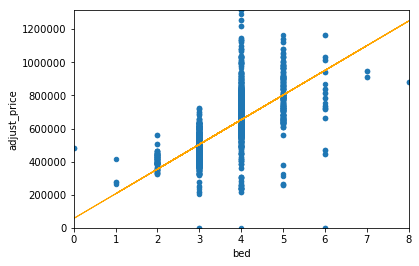

In [24]:
scatter_plot=north.plot(kind='scatter',x='bed',y='adjust_price',xlim=x_range,ylim=y_range)
fitted_values = fitted_model.predict(X)
regression_line=scatter_plot.plot(north['bed'],fitted_values,'-',color='orange',linewidth=1)